# TP1

## Ejercicio 5

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [2]:
def box_muller(u1,u2):
    z1 = np.sqrt(-2*np.log(u1))*np.cos(2*np.pi*u2)
    z2 = np.sqrt(-2*np.log(u1))*np.sin(2*np.pi*u2)
    return z1,z2

In [3]:
us = np.random.uniform(0,1,(100000,2))

In [4]:
z1 = []
z2 = []
for u1, u2 in us:
    zs = box_muller(u1,u2)
    z1.append(zs[0])    
    z2.append(zs[1])

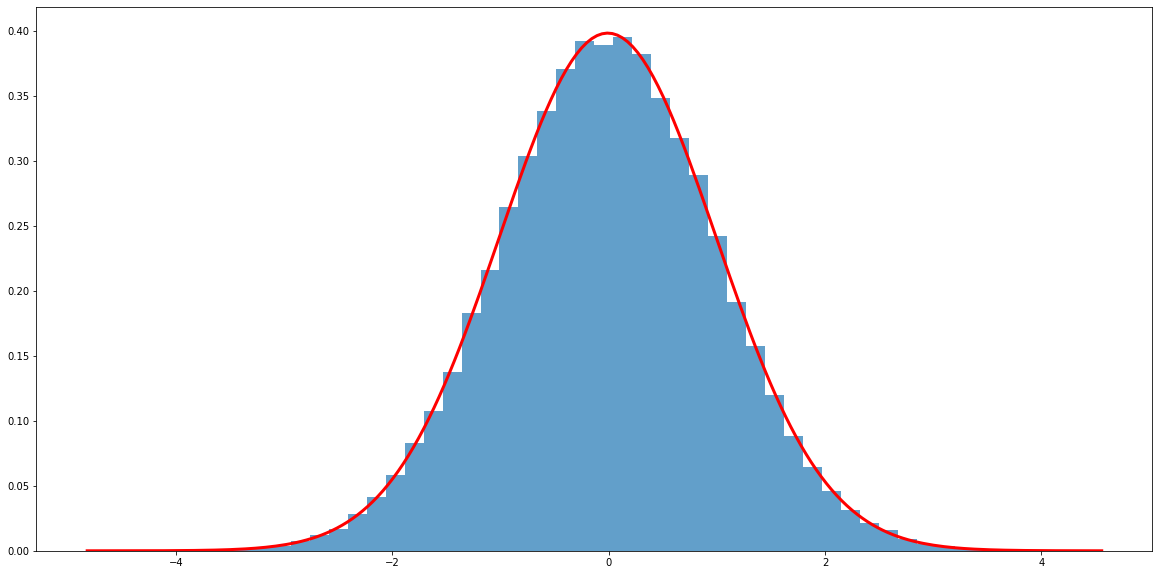

In [5]:
fig, ax = plt.subplots(figsize=(20,10))
sns.distplot(z1,fit=norm,kde=False,fit_kws={"color": "r", "lw": 3, "label": "normal"},hist_kws={"alpha": 0.7})
plt.show()

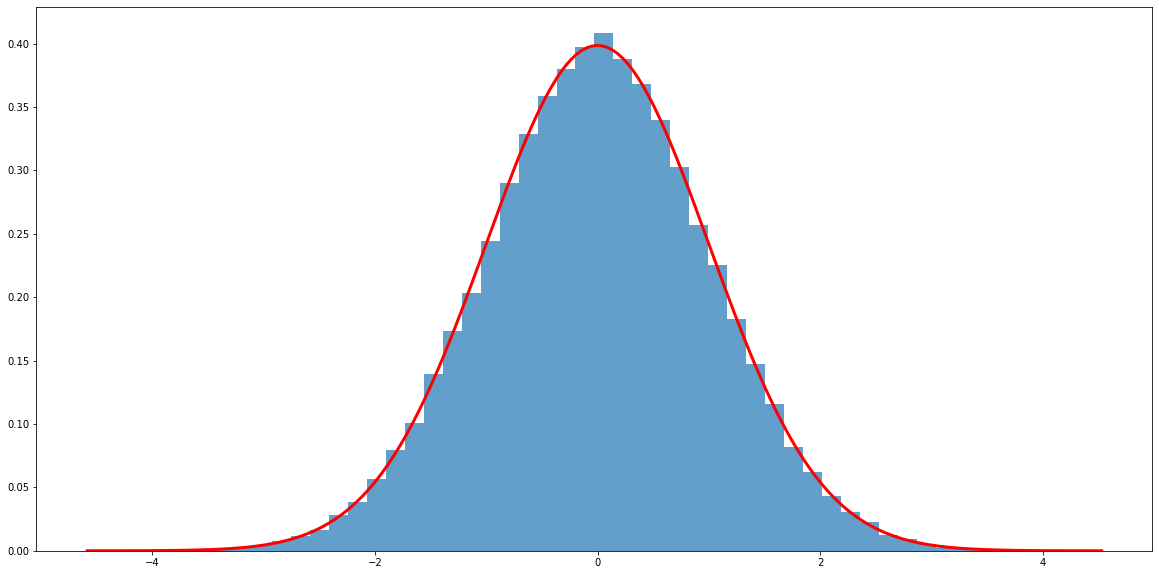

In [6]:
fig, ax = plt.subplots(figsize=(20,10))
sns.distplot(z2,fit=norm,kde=False,fit_kws={"color": "r", "lw": 3, "label": "normal"},hist_kws={"alpha": 0.7})
plt.show()